In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('zomato.csv.',encoding='ISO-8859-1' ) ## this method is used in any encoding requried

In [3]:
pd.set_option('Display.max_columns',100)

In [4]:
df.drop('Locality Verbose',axis=1,inplace=True)

In [5]:
df.head()

,Unnamed: 0,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.shape

(9551, 21)

In [7]:
df.columns = df.columns.str.replace(' ','_')

In [8]:
df.columns

Index(['Unnamed:_0', 'Restaurant_ID', 'Restaurant_Name', 'Country_Code',
       'City', 'Address', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [9]:
df.nunique()

Unnamed:_0              9551
Restaurant_ID           9551
Restaurant_Name         7446
Country_Code              15
City                     141
Address                 8918
Locality                1208
Longitude               8120
Latitude                8677
Cuisines                1825
Average_Cost_for_two     140
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Switch_to_order_menu       1
Price_range                4
Aggregate_rating          33
Rating_color               6
Rating_text                6
Votes                   1012
dtype: int64

In [10]:
df.groupby('City').Average_Cost_for_two.sum().nsmallest()

City
Miller             0
Dicky Beach        7
Inverloch          7
Lakes Entrance     7
Clatskanie        10
Name: Average_Cost_for_two, dtype: int64

In [11]:
df.groupby('City').Average_Cost_for_two.sum().nlargest()

City
Jakarta      4935000
New Delhi    3262390
Gurgaon       798270
Noida         582650
Tangerang     500000
Name: Average_Cost_for_two, dtype: int64

In [12]:
df.groupby('Restaurant_Name').Votes.sum().nlargest()

Restaurant_Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Farzi Cafe                   10098
Name: Votes, dtype: int64

In [13]:
df.groupby('City').Votes.sum().nlargest()

City
New Delhi    628340
Gurgaon      132160
Noida         73488
Bangalore     56115
Kolkata       44593
Name: Votes, dtype: int64

In [14]:
df.groupby('City').Aggregate_rating.sum().nlargest()

City
New Delhi    13347.8
Gurgaon       2964.3
Noida         2199.1
Faridabad      468.6
London          90.7
Name: Aggregate_rating, dtype: float64

In [15]:
df.groupby('Has_Online_delivery').Restaurant_Name.sum()

Has_Online_delivery
No     Le Petit SouffleIzakaya KikufujiHeat - Edsa Sh...
Yes    Famous Dave's BarbecuePizza Di RoccoCho Gao - ...
Name: Restaurant_Name, dtype: object

## Restaurant delivry online or not

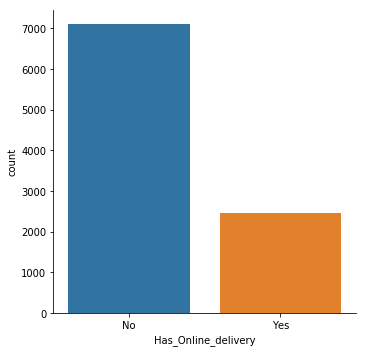

In [16]:
sns.catplot('Has_Online_delivery',data=df,kind='count')

## Restaurant allowed table booking or not

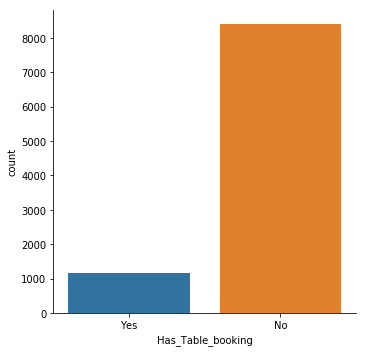

In [17]:
sns.catplot('Has_Table_booking',data=df,kind='count')

## Most famous chain in Bangalore

In [18]:
df1=df.loc[df['City']=='Bangalore']
df1.head(2)

,Unnamed:_0,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
726,726,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",1300,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
727,727,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,77.645396,12.970221,Asian,2400,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369


In [19]:
df1.groupby('Restaurant_Name').Aggregate_rating.sum()

Restaurant_Name
AB's - Absolute Barbecues            4.6
Big Brewsky                          4.5
Bombay Brasserie                     4.2
Communiti                            4.2
ECHOES Koramangala                   4.7
Eat Street                           4.3
Farzi Cafe                           4.4
Flechazo                             4.4
Glen's Bakehouse                     4.0
Hoot                                 3.9
Koramangala Social                   4.5
Onesta                              13.5
Sultans of Spice                     4.1
The Black Pearl                      4.1
The Fatty Bao - Asian Gastro Bar     4.7
Three Dots & A Dash                  3.9
Toit                                 4.8
Truffles                             4.7
Name: Aggregate_rating, dtype: float64

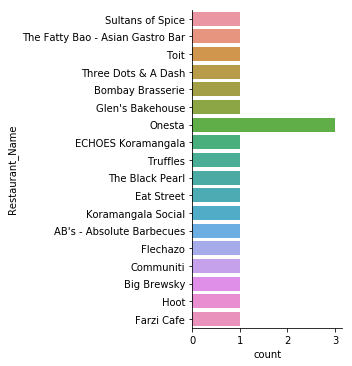

In [20]:
sns.catplot(y='Restaurant_Name',data=df1,kind='count')

## best location

In [21]:
df2= df.loc[(df['Has_Table_booking']== 'Yes') & (df['Aggregate_rating']>4)& (df['Votes']>2000) &(df['Rating_text']=='Excellent')]
df2.head()

,Unnamed:_0,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
591,591,208939,AB's Absolute Barbecues,214,Dubai,"Shop G05, Sidra Tower, Near GEMS Wellington Sc...",Dubai Media City,55.178746,25.107773,"Indian, Continental",160,Emirati Diram(AED),Yes,No,No,No,3,4.8,Dark Green,Excellent,2510
727,727,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,77.645396,12.970221,Asian,2400,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
743,743,58882,Big Brewsky,1,Bangalore,"Behind MK Retail, Before WIPRO Corporate Offic...",Sarjapur Road,77.683237,12.913041,"Finger Food, North Indian, Italian, Continenta...",1800,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.5,Dark Green,Excellent,5705
2483,2483,18075122,The Fusion Kitchen,1,Mumbai,"Shop 1, Opposite Veda Building, Near Bhavdevi ...",Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",1000,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.7,Dark Green,Excellent,2083


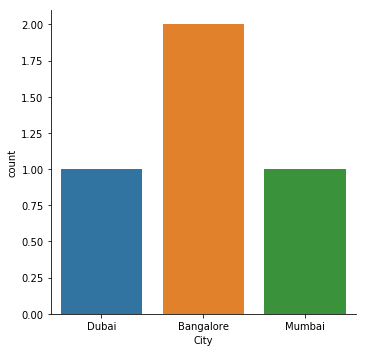

In [22]:
sns.catplot('City',data=df2,kind='count')

## Relation between Location and rating

In [23]:
df['Country_Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

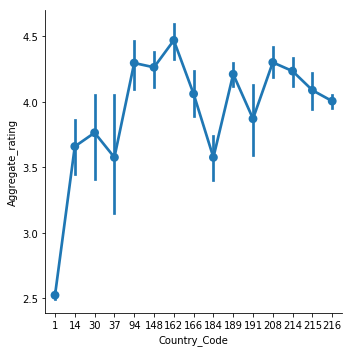

In [24]:
sns.catplot(x='Country_Code',y='Aggregate_rating',data=df,kind='point')


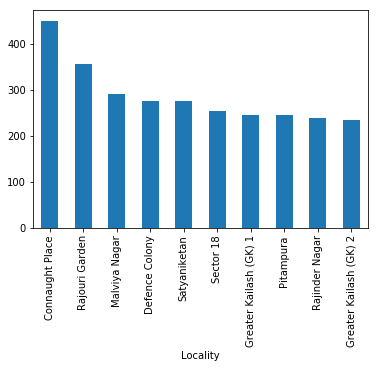

In [25]:
df.groupby('Locality').Aggregate_rating.sum().nlargest(10).plot(kind='bar')

## No.of restaurnant in a location

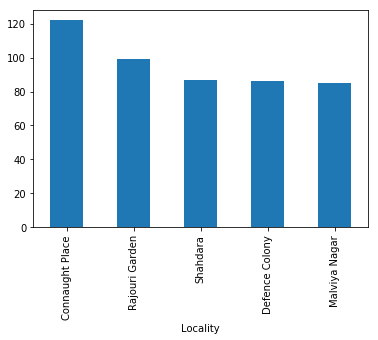

In [26]:
df.groupby('Locality').Restaurant_ID.count().nlargest().plot(kind='bar')

## Relation between Type and Rating

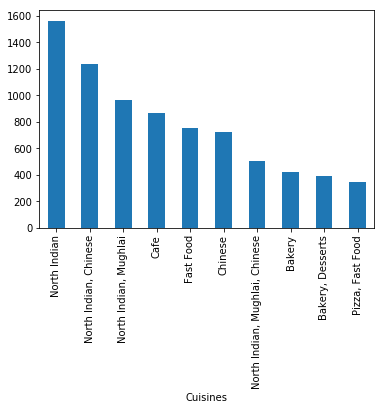

In [27]:
df.groupby('Cuisines').Aggregate_rating.sum().nlargest(10).plot(kind='bar')

## Resturnant types

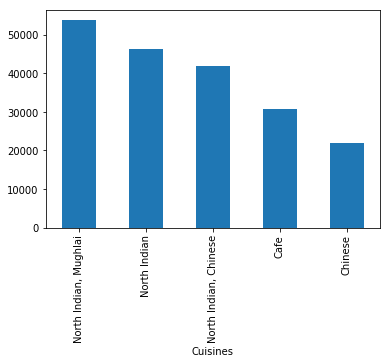

In [28]:
df.groupby('Cuisines').Votes.sum().nlargest().plot(kind='bar')

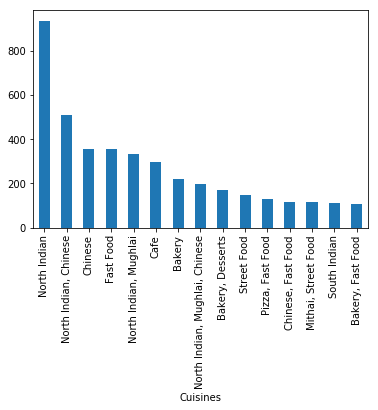

In [42]:
df.groupby('Cuisines').Votes.count().nlargest(15).plot(kind='bar')

In [49]:
counts= df['City'].value_counts().head(20)
counts

New Delhi                                                                                                                                                                                                                                                                   5473
Gurgaon                                                                                                                                                                                                                                                                     1118
Noida                                                                                                                                                                                                                                                                       1080
Faridabad                                                                                                                                                                            

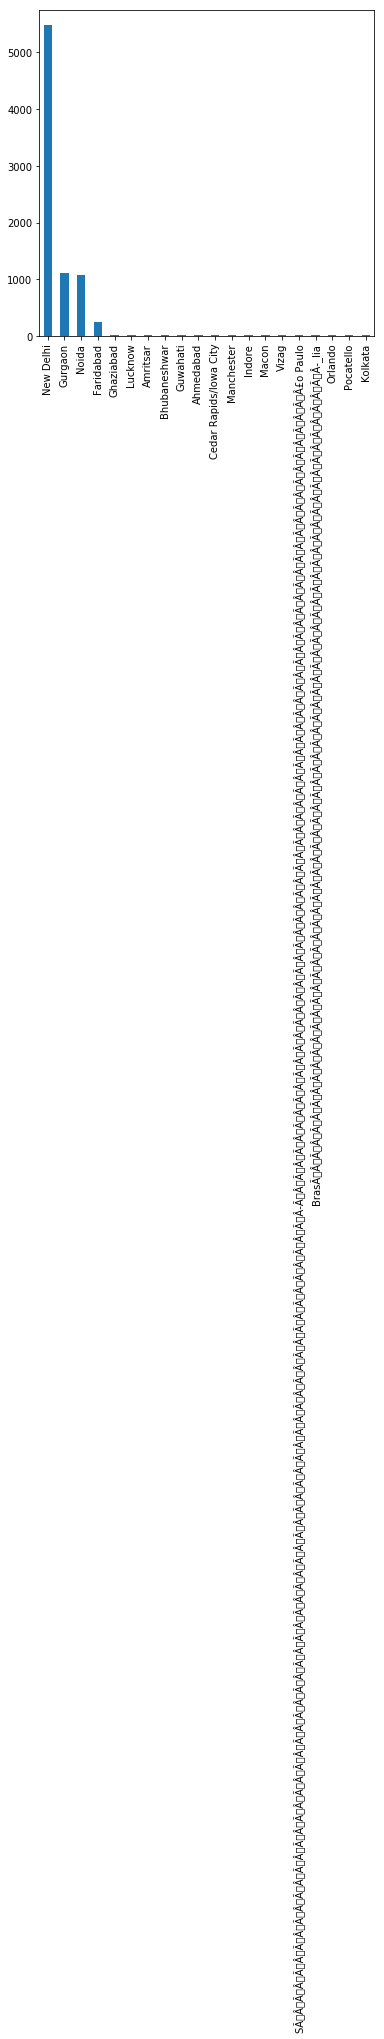

In [51]:
fig = plt.figure(figsize=(6,6))
ax= fig.gca()# define axis
counts.plot.bar(ax=ax)

In [47]:
counts= df['Cuisines'].value_counts().head(20)
counts

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
North Indian, Fast Food            74
Ice Cream                          74
Name: Cuisines, dtype: int64

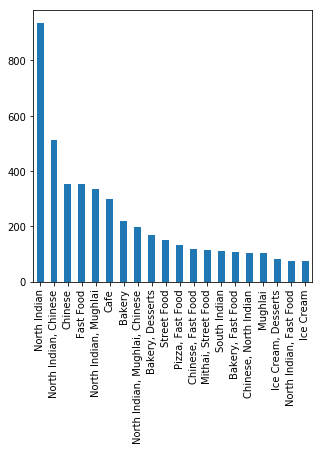

In [48]:
fig = plt.figure(figsize=(5,5))
ax= fig.gca()# define axis
counts.plot.bar(ax=ax)

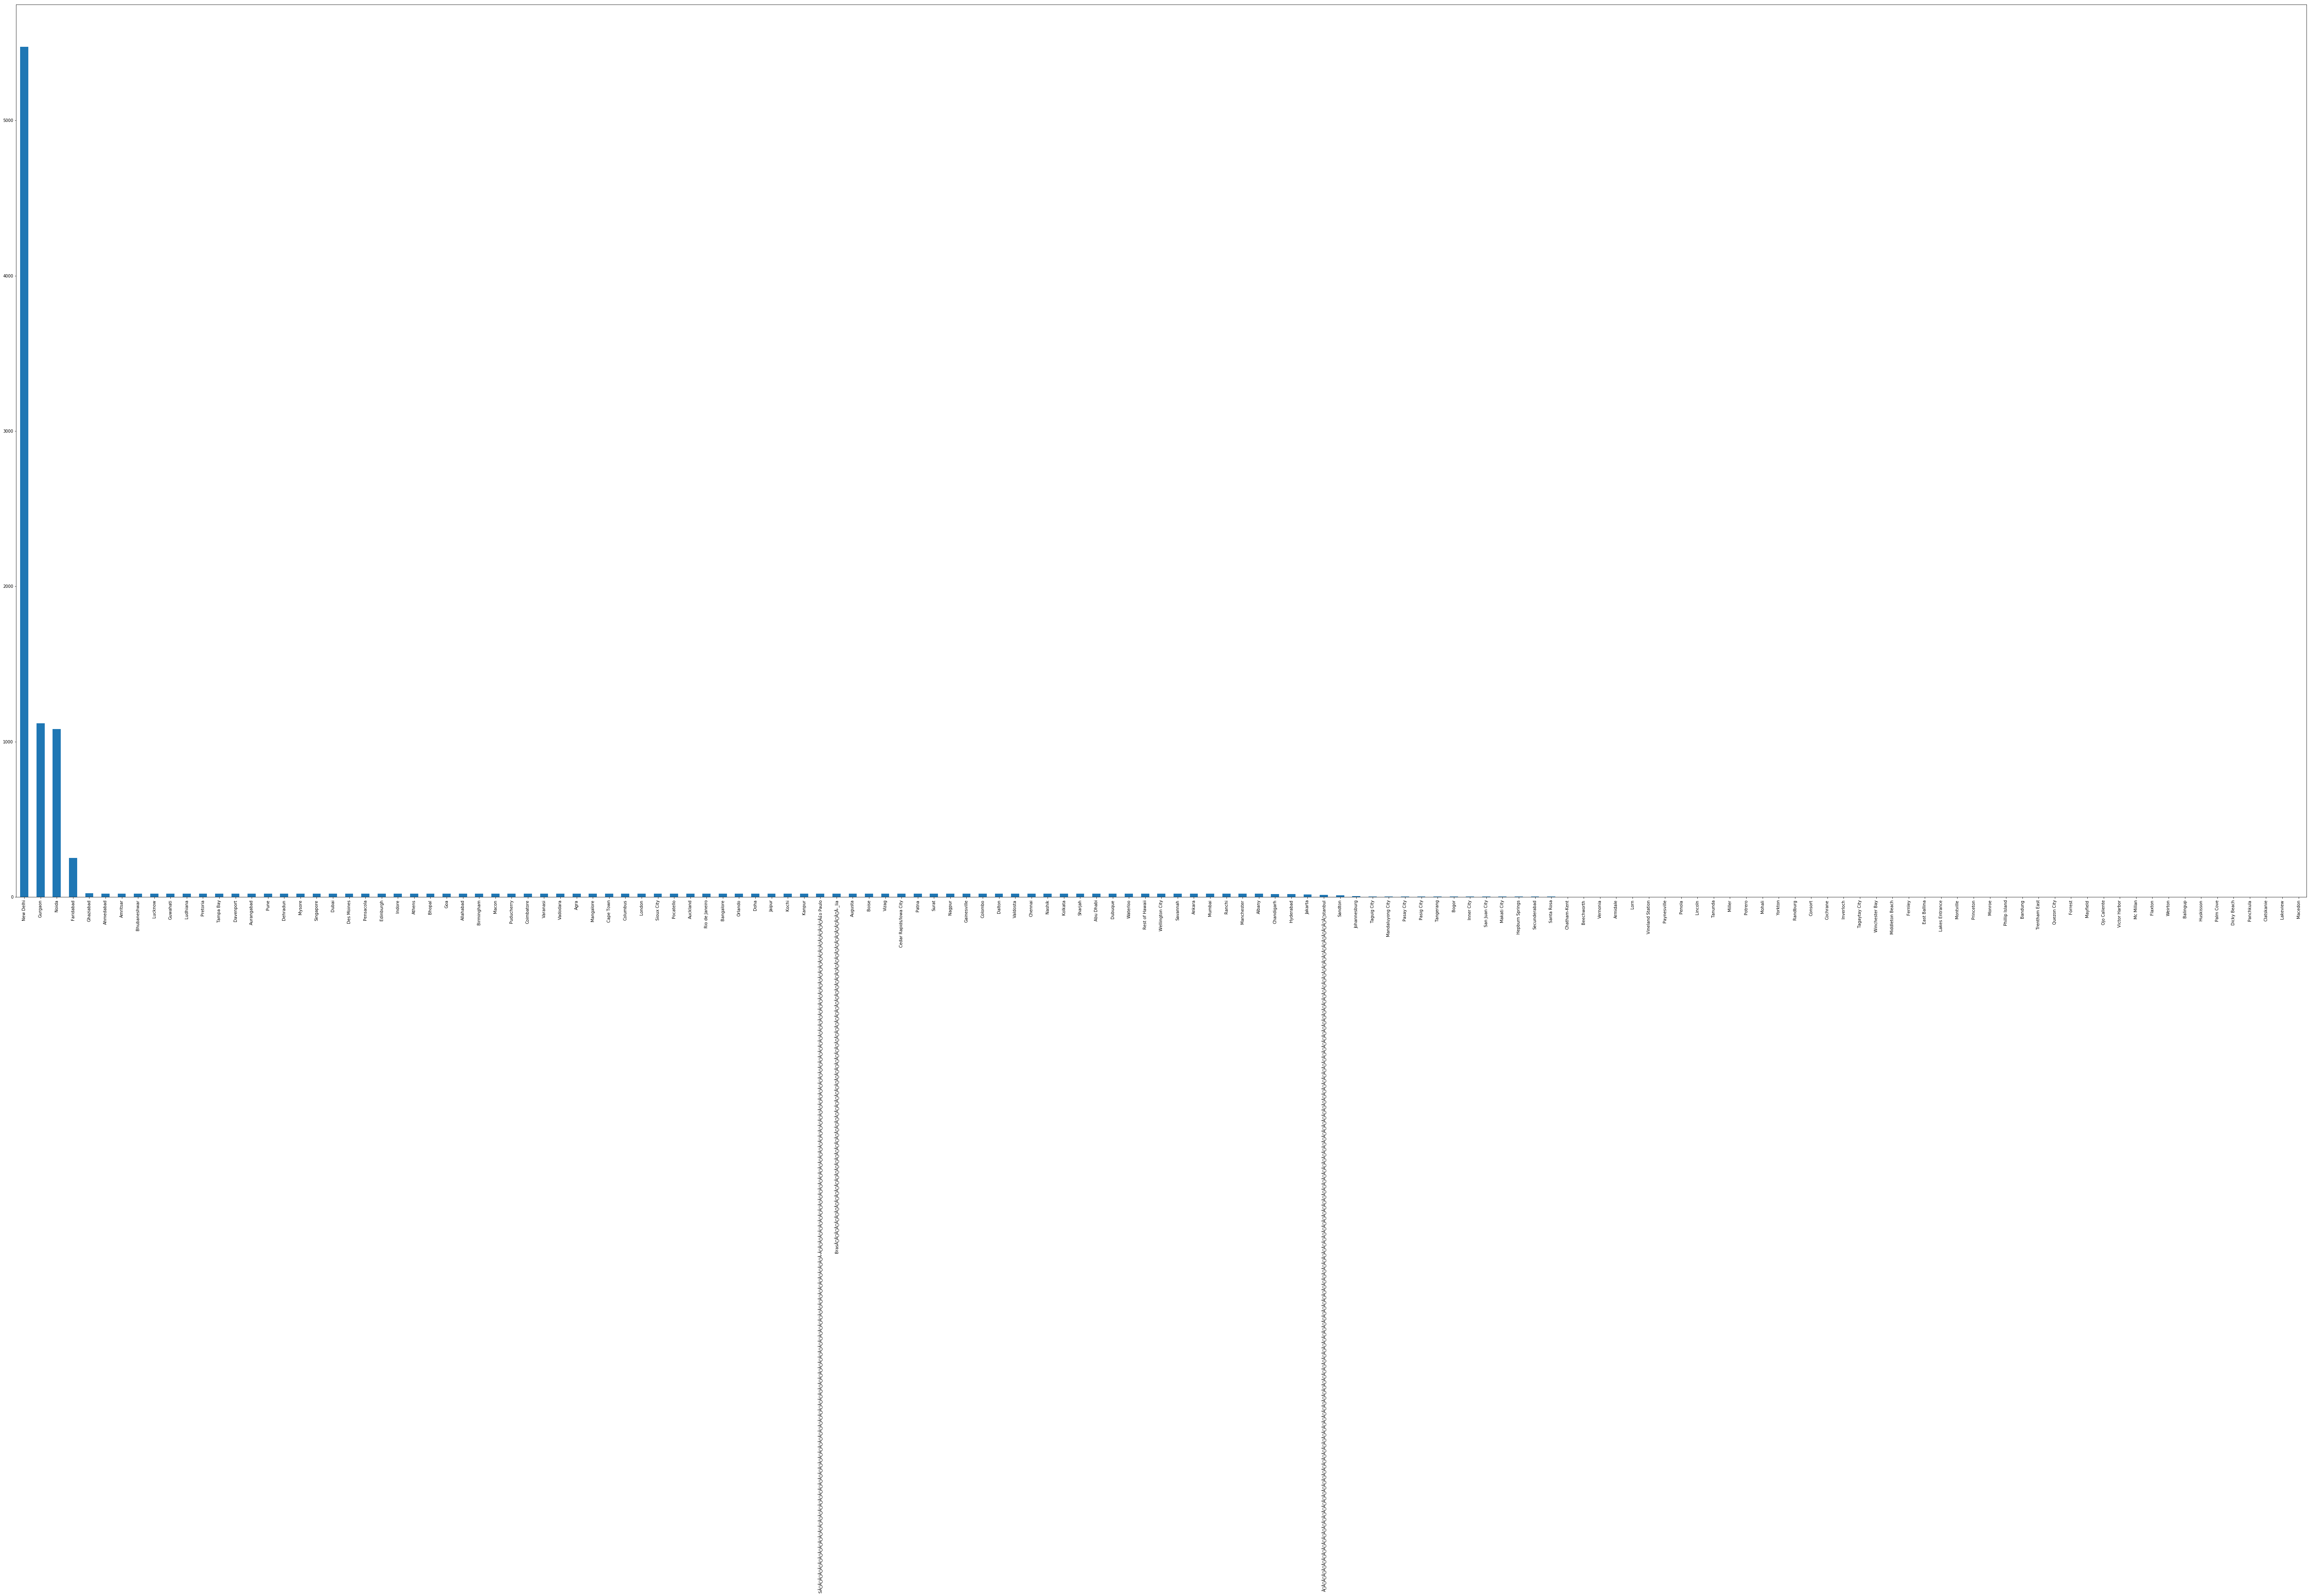

In [8]:
df['City'].value_counts().plot(kind='bar',figsize=[100,40])